In [1]:
import json
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
dump_paths = [
    "./logs/8wrk_system/varied_beta_time-const1_fees-smin128-80cycle/dump.json",
    "./logs/8wrk_system/varied_beta_time-rand_fees-smin128-80cycle/dump.json",
    "./logs/logs_3_full/dump.json",
]

In [3]:
all_data = []
for path in dump_paths:
    with open(path, "r") as f:
        data = json.load(f)
    vals = list(d for d in data.values() if type(d) == dict)
    all_data += vals

In [13]:

bins = list(set((d["MAX_TIME"] for d in all_data)))
bins.sort()

In [14]:
train_time_dict = {b: [x["training_duration"] / b for x in all_data if x["MAX_TIME"] == b] for b in bins}
network_time_dict = {b: [x["send_data_duration"] / b for x in all_data if x["MAX_TIME"] == b] for b in bins}

In [15]:
avg_train_times = [mean(train_time_dict[b]) for b in bins]
avg_network_times = [mean(network_time_dict[b]) for b in bins]

In [16]:
avg_network_times

[18.573692957560223,
 8.775274344494468,
 6.310753411513108,
 3.5440824544997445,
 2.6775402300698414,
 0.3574013705253601,
 0.3114926255411572,
 0.29094374115977967,
 0.2753970671445131,
 0.2585821116964022,
 0.24088771075010298]

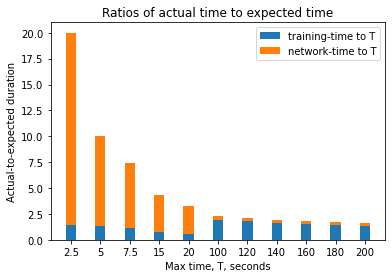

In [19]:
fig, ax = plt.subplots()
width = 0.35

labels = [str(b) for b in bins]

ax.bar(labels, avg_train_times, width, label='training-time to T')
ax.bar(labels, avg_network_times, width, bottom=avg_train_times,
       label='network-time to T')

ax.set_ylabel('Actual-to-expected duration')
ax.set_xlabel("Max time, T, seconds")
ax.set_title('Ratios of actual time to expected time')
ax.legend()

plt.show()